In [1]:
import string
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import gensim 

from sklearn.decomposition import PCA
from gensim.models import FastText as FT_gensim
from gensim.test.utils import datapath
from gensim.models.wrappers import FastText as FT

%matplotlib inline
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\egapa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
df = pd.read_excel("../pemilu.xlsx")
df

,id_pembuat,id_status,nama_pembuat,teks_status,gambar_status,url_komentar,waktu_status,id_komentar,id_user_komen,komentar,waktu_komen,label
0,23383061178,23383061178_10152076252911179,Bang Nafie,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076253441179,794948677210695,Oke pak boss!!,2014-06-05 03:55:15,positif
1,23383061178,23383061178_10152076252911179,Sumy Kakasyi Suhaimy,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076253906179,355122887988412,Jangan dusta,2014-06-05 03:55:29,negatif
2,23383061178,23383061178_10152076252911179,Roberto Red,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076253996179,297825977080553,PROBOWO is the WINNER of PEMILU 2014,2014-06-05 03:55:32,positif
3,23383061178,23383061178_10152076252911179,Sugiarman Arman,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076254066179,298708870333739,ilmu padi,2014-06-05 03:55:35,netral
4,23383061178,23383061178_10152076252911179,Rio Corps Taruna,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076254216179,1523715244533780,Hidup Pak Prabowo ..,2014-06-05 03:55:42,positif
...,...,...,...,...,...,...,...,...,...,...,...,...
3359,249750628565406,249750628565406_276917339182068,Anita Rizkia,"Dukungan anda semua adalah amanah, dan apapun ...",https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/249750628565406/posts...,2014-07-09 03:19:51,276891429184659_276927652514370,967613349931842,salam 2 jari,2014-07-09 03:25:45,positif
3360,249750628565406,249750628565406_276917339182068,Ari Bin Abu Bakar,"Dukungan anda semua adalah amanah, dan apapun ...",https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/249750628565406/posts...,2014-07-09 03:19:51,276891429184659_276918865848582,773356856051191,"Jujur, ketika Ane membuka Surat Suara tadi, An...",2014-07-09 03:21:40,negatif
3361,249750628565406,249750628565406_276917339182068,Agek James,"Dukungan anda semua adalah amanah, dan apapun ...",https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/249750628565406/posts...,2014-07-09 03:19:51,276891429184659_276921042515031,710343512387954,BAPAK JOKOWI KAMI SEMUA RAKYAT INGIN BAPAK JD ...,2014-07-09 03:24:02,positif
3362,249750628565406,249750628565406_276917339182068,ChairudinDr Humaniora,"Dukungan anda semua adalah amanah, dan apapun ...",https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/249750628565406/posts...,2014-07-09 03:19:51,276891429184659_276931322514003,10152763210314600,"Tanda2 alam, pemilu 2day on 9 Juli (9-7= 2) ,...",2014-07-09 03:26:36,positif


In [3]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

df_pos = df_train[df_train['label'] == 'positif'].head(95)
df_neg = df_train[df_train['label'] == 'negatif'].head(95)
df_net = df_train[df_train['label'] == 'netral']

In [4]:
df_DownSampling = df_net.append(df_pos)
df_DownSampling = df_DownSampling.append(df_neg)
df_DownSampling = df_DownSampling.dropna()
df_DownSampling

,id_pembuat,id_status,nama_pembuat,teks_status,gambar_status,url_komentar,waktu_status,id_komentar,id_user_komen,komentar,waktu_komen,label
2005,249750628565406,249750628565406_252600671613735,Ovy Al Miftach,Saya sangat senang bersilaturahmi dengan sauda...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/249750628565406/posts...,2014-06-12 03:46:15,252600474947088_252617668278702,672541866186831,"Sebelum pilih atau nyoblos ingat ""PERISTIWA PE...",2014-06-12 04:31:27,netral
525,23383061178,23383061178_10152107399446179,Dewi Ilalang,"Saya sependapat dengan anda, mbak Zara. Secara...",https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-17 09:33:05,10152107391596179_10152107407386179,1551211571759190,Dan tolong jangan jadikan pendidikan ajang kom...,2014-06-17 09:37:29,netral
250,23383061178,23383061178_10152090482251179,Ferga Dipa,Semua anak bangsa memiliki hak dan kewajiban y...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-11 06:04:02,10152090477236179_10152090484696179,10205101709287300,Inisialnya deh pak yg ttg pertanyaan pak JK td...,2014-06-11 06:05:15,netral
553,23383061178,23383061178_10152109586746179,Shep Thea Ashaksasar,Selamat pagi ibu Umrah. Membaca harapan dari i...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-18 03:46:10,10152109586746179_10152109591086179,560184980749833,? ?,2014-06-18 03:47:58,netral
785,23383061178,23383061178_10152122493681179,Romy Kampiun Pamekasan,Selamat sore sahabat. Kembali saya ingin menya...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-22 09:16:56,10152122486176179_10152122514601179,1481214845486010,Semangat Madura semakin berapi api dalam\nmeny...,2014-06-22 09:21:01,netral
...,...,...,...,...,...,...,...,...,...,...,...,...
2246,249750628565406,249750628565406_255802404626895,Anah Khazanah,"Selamat siang, saudara-saudaraku dan selamat b...",https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/249750628565406/posts...,2014-06-17 05:19:26,255802077960261_255823507958118,827443483942463,Sederhana sederhana. Coba lihat istri anda pak...,2014-06-17 05:43:07,negatif
1053,23383061178,23383061178_10152142178681179,M Gibran Samudra,Saya Prabowo Subianto bersama mitra saya Muham...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-28 11:00:29,10152142178681179_10152142280711179,454352828038737,Amin jkw- jk tetep .....maaf ye salam 2 jari ..,2014-06-28 11:06:06,negatif
2351,249750628565406,249750628565406_257000497840419,Dodod Srb,Kemarin saya bersilaturahmi dengan para pengra...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/249750628565406/posts...,2014-06-19 01:37:34,257000491173753_257014654505670,792216934176499,"Capres jual obat,,urus Jakarta aja gk becus,gm...",2014-06-19 01:59:24,negatif
1414,23383061178,23383061178_10152164898431179,Berry Nitu Ondo,"Terima kasih saudara Ray Sahetapy, Fauzi Baadi...",https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-07-05 00:42:33,10152164898431179_10152164908241179,1543578375877760,2 jari bowo,2014-07-05 00:44:49,negatif


In [5]:
df_DownSampling['label'].value_counts()

negatif    83
netral     69
positif    69
Name: label, dtype: int64

In [6]:
import re
import string

nltk.download('punkt')

komentar = df_DownSampling['komentar'].astype(str)

#Lower case
komentar = komentar.apply(lambda x: x.lower())

#Remove URL
komentar = komentar.apply(lambda x: re.sub('https?://[A-Za-z0-9./]+','',x))
komentar = komentar.apply(lambda x: re.sub('http?://[A-Za-z0-9./]+','',x))

#Remove Number
komentar = komentar.apply(lambda x: re.sub(r"\d", "", x))

#Before Punctuation
komentar = komentar.apply(lambda x: re.sub(r'(?<=[,.])(?=[^\s])', r' ', x))

#Punctuation
komentar = komentar.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

#Remove Non Alphanumeric
komentar = komentar.apply(lambda x: re.sub(r'([^\s\w]|_)+', '', x))

#Tokenizing
komentar = komentar.apply(lambda x: nltk.tokenize.word_tokenize(x))

komentar

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\egapa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


2005    [sebelum, pilih, atau, nyoblos, ingat, peristi...
525     [dan, tolong, jangan, jadikan, pendidikan, aja...
250     [inisialnya, deh, pak, yg, ttg, pertanyaan, pa...
553                                                    []
785     [semangat, madura, semakin, berapi, api, dalam...
                              ...                        
2246    [sederhana, sederhana, coba, lihat, istri, and...
1053        [amin, jkw, jk, tetep, maaf, ye, salam, jari]
2351    [capres, jual, obat, urus, jakarta, aja, gk, b...
1414                                         [jari, bowo]
3309    [jangan, lupa, n, jangan, dugal, y, buat, yg, ...
Name: komentar, Length: 221, dtype: object

In [7]:
model_gensim = FT_gensim(size=300, 
                         negative=5, 
                         min_count=1, 
                         min_n=2, 
                         max_n=3, 
                         sg=0, 
                         sorted_vocab=1, 
                         word_ngrams=1, 
                         window=5, 
                         callbacks=(),
                         ns_exponent=0.75, 
                         cbow_mean=0, 
                         workers=5, 
                         alpha=0.1, 
                         min_alpha=0.025)

In [8]:
model_gensim.build_vocab(komentar)

In [9]:
total_examples = model_gensim.corpus_count
model_gensim.train(
    sentences=komentar,
    total_examples=total_examples, 
    epochs = 100
)

In [10]:
model_gensim.save('XGBDownSampling.bin')
loaded_model = FT_gensim.load('XGBDownSampling.bin')

In [11]:
loaded_model.wv.similarity("bagus", "buruk")

0.6786666

In [12]:
loaded_model.wv.distance("bagus", "jelek")

0.3953101634979248

In [13]:
loaded_model.wv.most_similar(positive="jelek", topn=5)

[('komplek', 0.6703883409500122),
 ('rek', 0.6533551812171936),
 ('jelaskan', 0.6420489549636841),
 ('jelas', 0.639050304889679),
 ('jempolku', 0.6382046937942505)]

In [14]:
loaded_model.wv.most_similar_cosmul(positive="bagus", negative=None, topn=5)

[('tokobagus', 0.9523949027061462),
 ('bagas', 0.9371840953826904),
 ('bus', 0.9277886748313904),
 ('bs', 0.9257438778877258),
 ('vs', 0.9253938794136047)]

In [15]:
similar_words = {search_term: [item[0] for item in loaded_model.wv.most_similar([search_term], topn=5)]
                for search_term in ['mantap', 'keren', 'bagus', 'jelek', 'parah', 'cepat']}
similar_words

{'mantap': ['maap', 'matap', 'mnta', 'mana', 'madridista'],
 'keren': ['kerena', 'euren', 'kerjaan', 'keraton', 'kerja'],
 'bagus': ['tokobagus', 'bagas', 'bus', 'bs', 'vs'],
 'jelek': ['komplek', 'rek', 'jelaskan', 'jelas', 'jempolku'],
 'parah': ['para', 'patonah', 'pa', 'pastilah', 'palsu'],
 'cepat': ['tepat', 'ceplos', 'dapat', 'niat', 'bersepakat']}

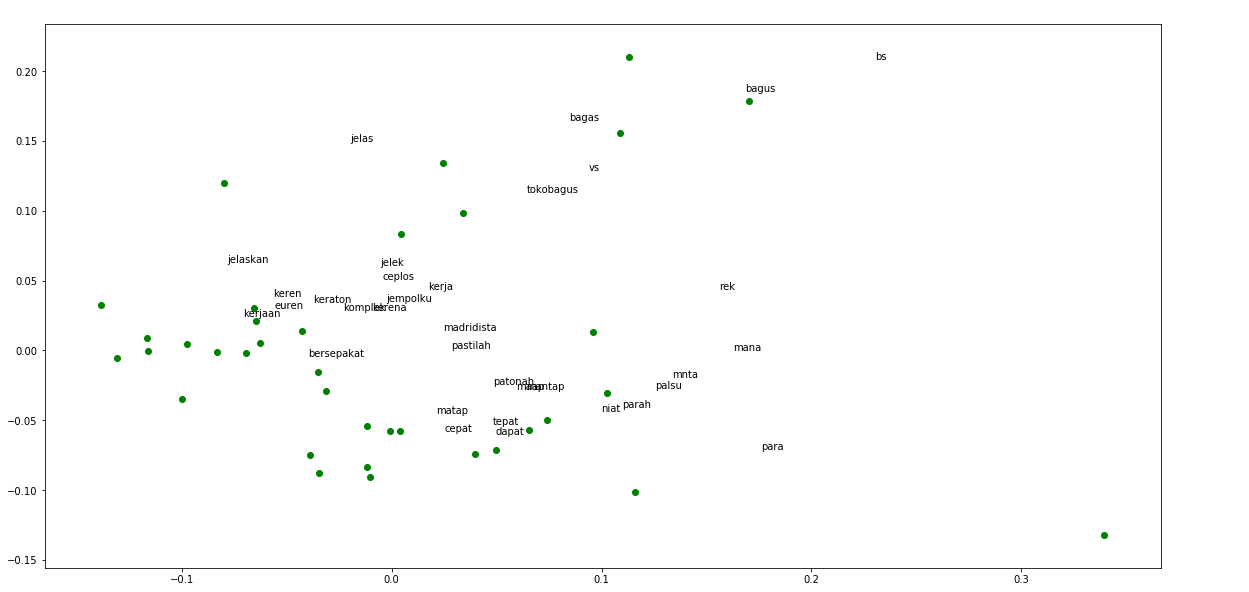

In [16]:
words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = loaded_model.wv[words]

pca = PCA(n_components=2)
np.set_printoptions(suppress=True)
P = pca.fit_transform(wvs)
labels = words

plt.figure(figsize=(20, 10))
plt.scatter(P[:, 0], P[:, 1], c='green', edgecolors='g')
for label, x, y in zip(labels, P[:, 0], P[:, 1]):
    plt.annotate(label, xy=(x+0.06, y+0.03), xytext=(0, 0), textcoords='offset points')